<a href="https://colab.research.google.com/github/camilotayac/computational_chemistry-TC/blob/master/Colab/protein_trajectory_similarity_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧙‍♂️ **Protein** trajectory similarity analysis ♾️ Análisis de similitud de trayectorias de **proteínas**

🐉 **@Tyac**

🏦 **Universidad de Caldas**

🌇 **Manizales - Colombia**

In [ ]:
# @title ## 🟢  Installation of programs and import of required libraries ♾️ Instalación de programas e importación de librerías necesarias
!pip install --upgrade MDAnalysis
!pip install --upgrade MDAnalysis[analysis]
!pip install matplotlib


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import MDAnalysis as mda
from MDAnalysis.analysis import psa
from MDAnalysis.analysis import encore
from MDAnalysis.analysis.encore.clustering import ClusteringMethod as clm
import warnings
# suppress some MDAnalysis warnings about writing PDB files
warnings.filterwarnings('ignore')

In [ ]:
# @title ## 📁 Files for analysis ♾️ Archivos para el análisis
# @markdown ### **🇺🇸** - Select whether you will work with tutorial files or with your own files
# @markdown ### **🇪🇸** - Seleccione si va a trabajar con archivos del tutorial o con archivos propios
files = 'Tutorial files - Archivos del tutorial'# @param ['Tutorial files - Archivos del tutorial', 'Own files - Archivos propios']
# @markdown #### 🔴 **🇺🇸 - Note:** add the address of your folder, example: ***folder_a*** or ***folder_a/folder_b***
# @markdown #### 🔴 **🇪🇸 - Nota:** agregue la dirección de su carpeta, ejemplo: ***carpeta_a*** o ***carpeta_a/carpeta_b***
drive_folder_path = "MD/D" #@param {type:"string"}

if files == 'Tutorial files - Archivos del tutorial':
  %cd /content
  !git clone https://github.com/camilotayac/computational_chemistry-TC.git
  %cd computational_chemistry-TC/Examples
elif files == 'Own files - Archivos propios':
  from google.colab import drive
  drive.mount('/content/drive')
  carpeta = "/content/drive/MyDrive/" + drive_folder_path
  %cd {carpeta}

Mounted at /content/drive
/content/drive/MyDrive/MD/D


HARMONIC
CLUSTERING
Estimating the error in a clustering ensemble similarity analysis
AVGS Matrix
 [[0.         0.69314718]
 [0.69314718 0.        ]]
STDS Matrix
 [[0.00000000e+00 4.96506831e-17]
 [4.96506831e-17 0.00000000e+00]]


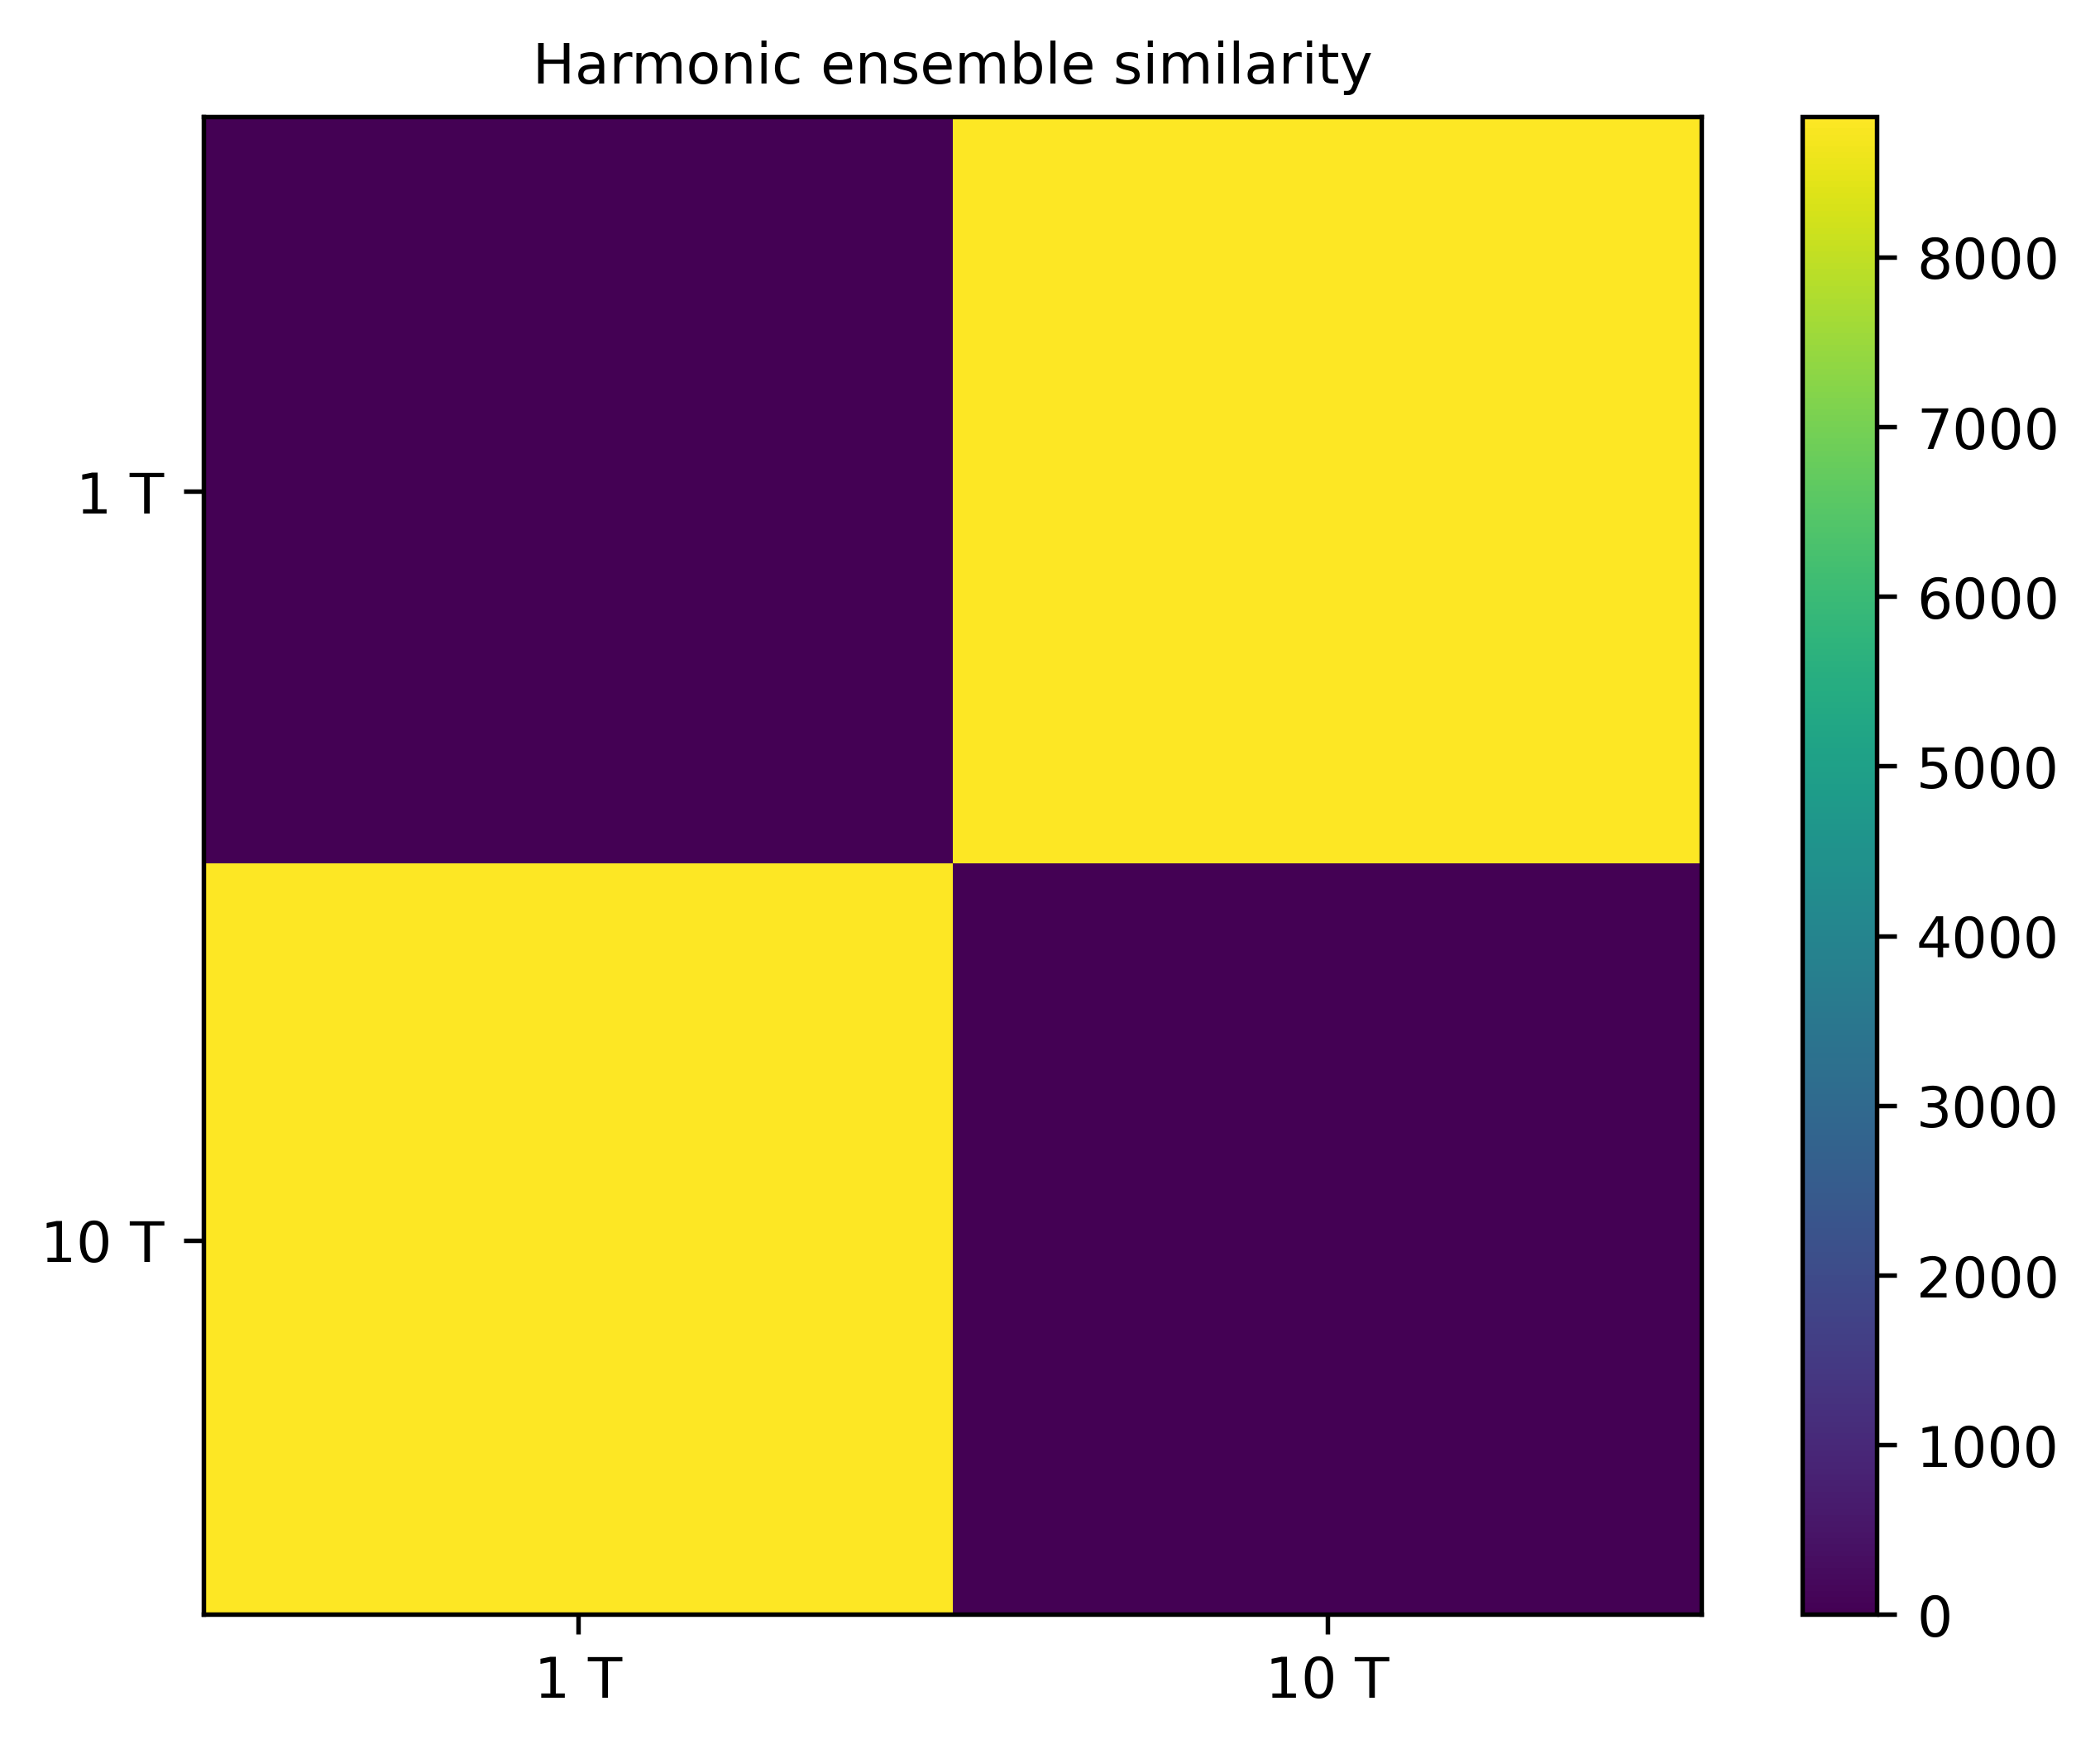

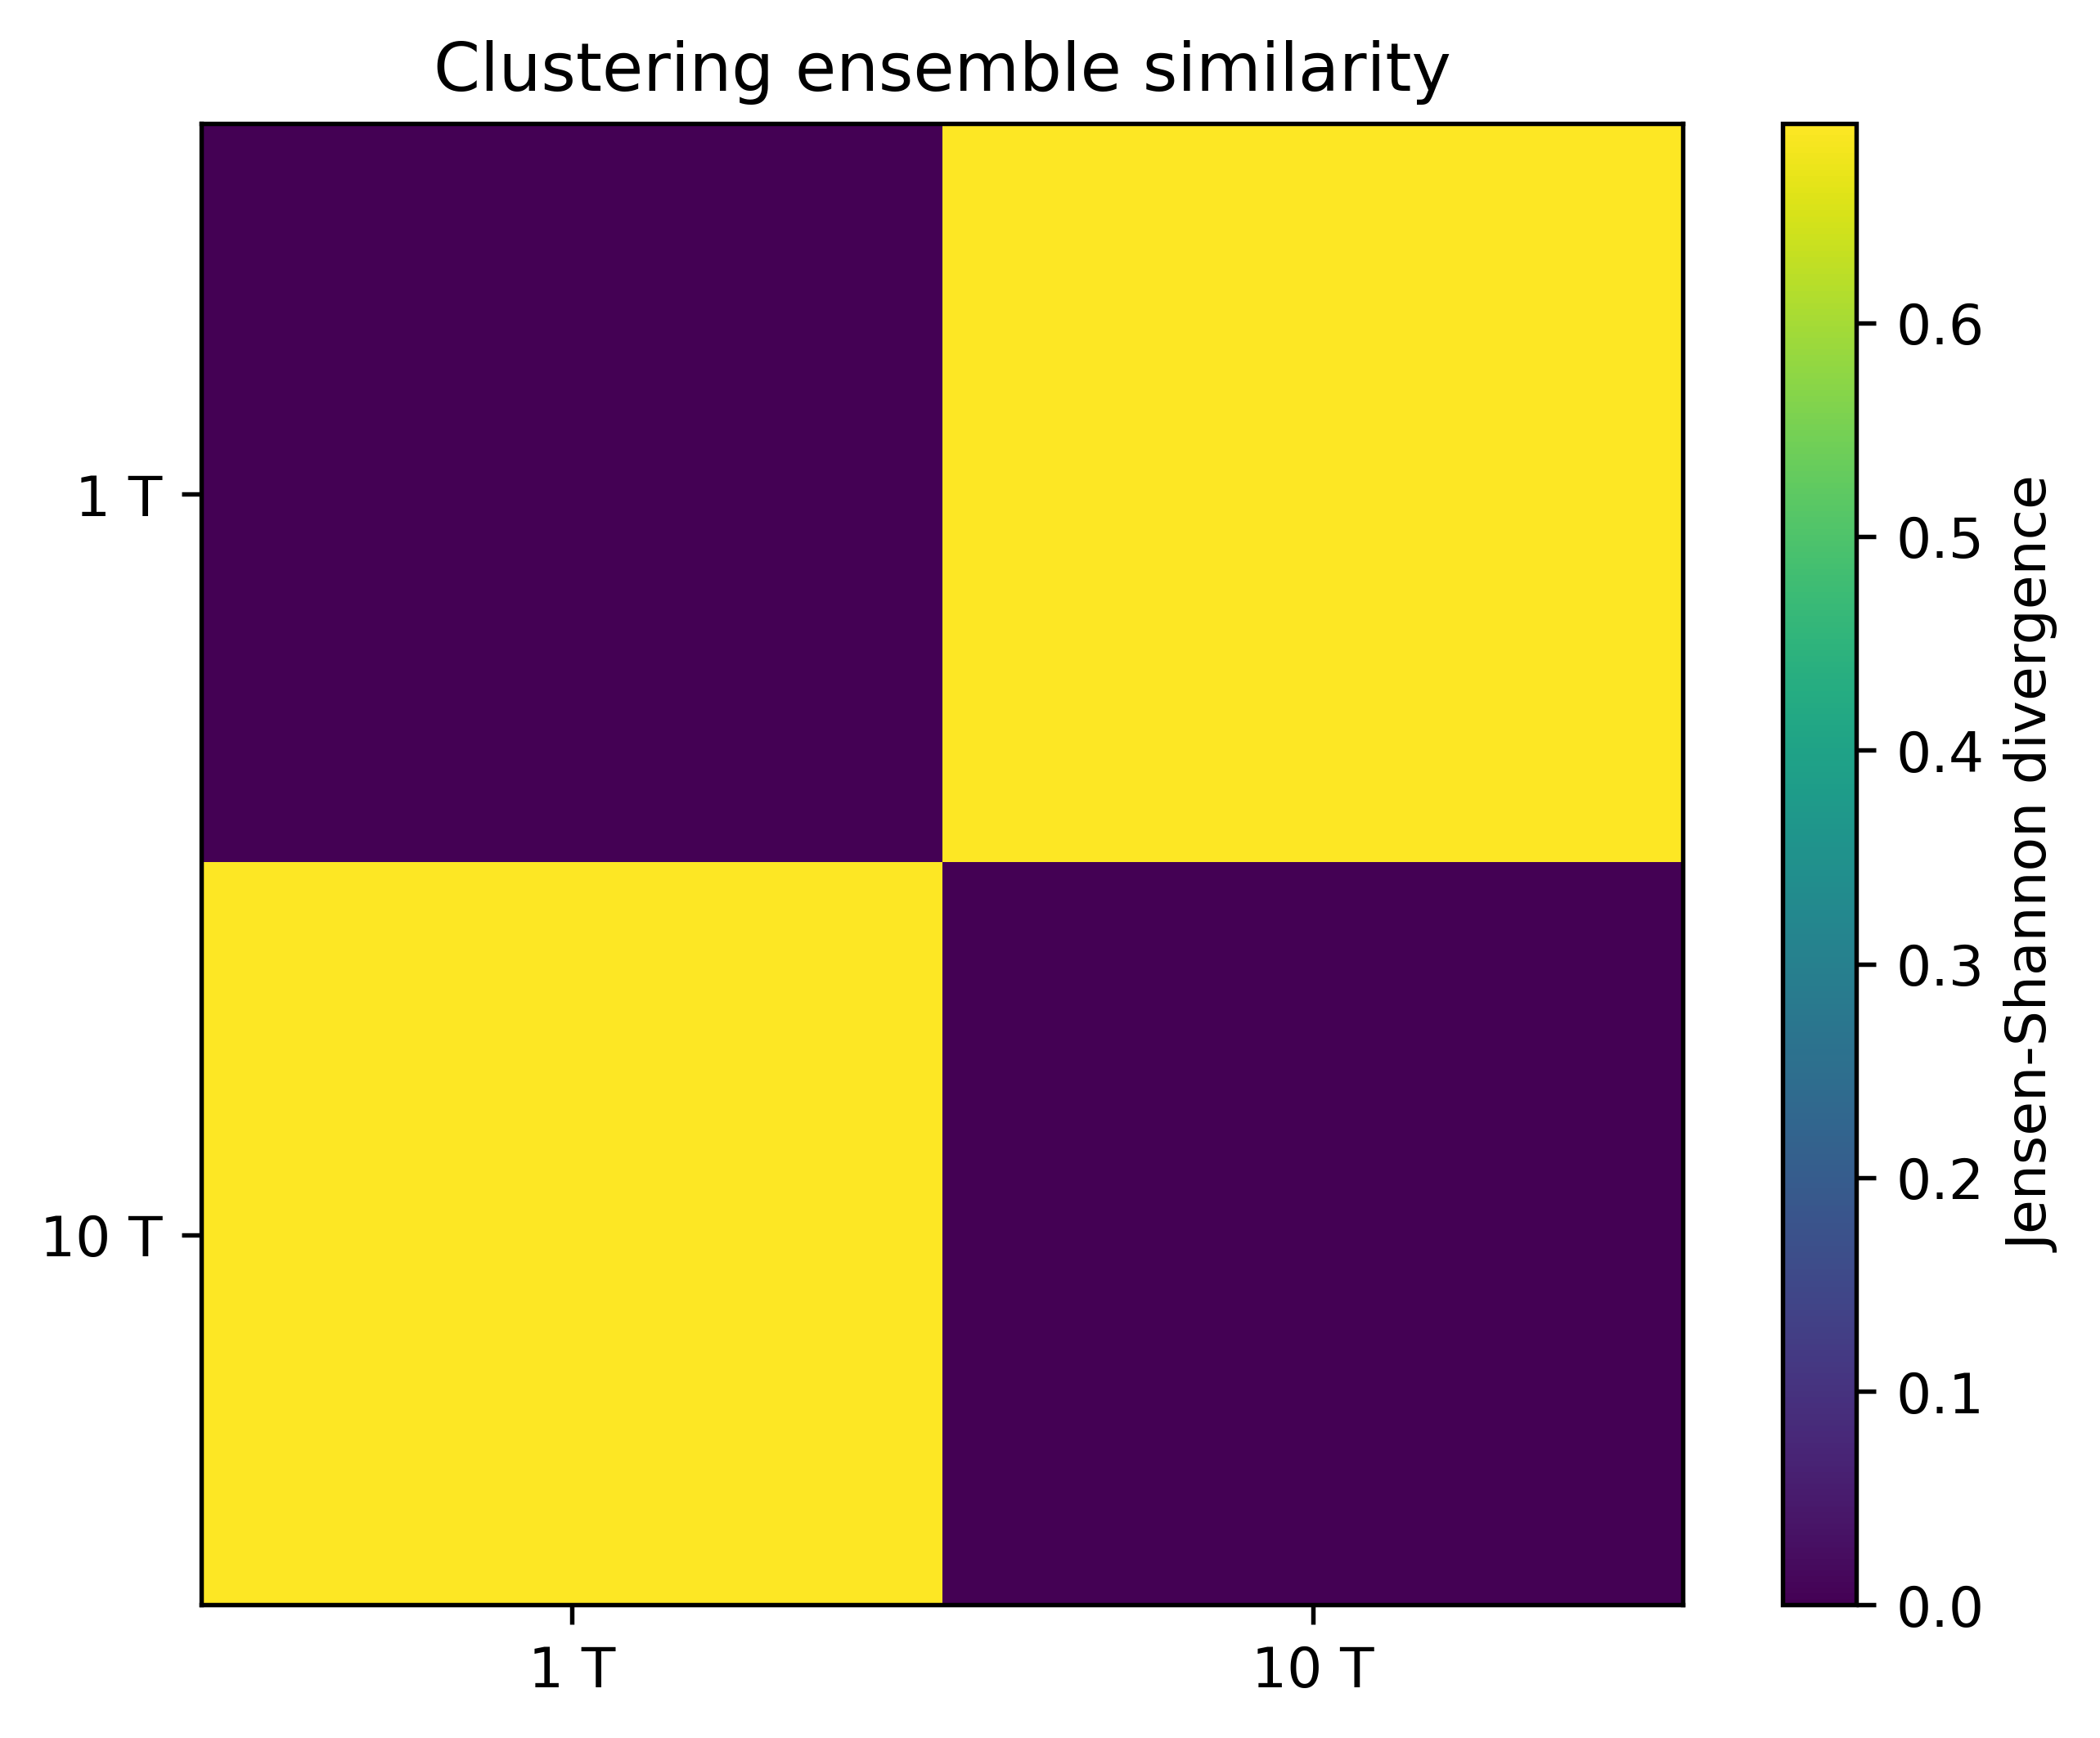

In [22]:
# @title ## 🟢 Variables for analysis ♾️ Variables para análisis

# @markdown ### **🇺🇸** - **File name(s) without extension**
# @markdown ### **🇺🇸** - **🔴 NOTE:** Remember if you are going to use several files, separate them with **( ; )**
# @markdown ### **🇺🇸** - **🔴 NOTE:** Remember that the files must be in ***PDB*** and ***XTC*** format.
# @markdown ### **🇪🇸** - **Nombre del o los archivos sin extensión**
# @markdown ### **🇪🇸** - **🔴 NOTA:** Recuarda si vas a usar varios archivos, separalos con **( ; )**
# @markdown ### **🇪🇸** - **🔴 NOTA:** Recuarda que los archivos deben estar en formato ***PDB*** y  ***XTC***

file_name = "ca1t;ca10t" # @param {type:"string"}
file_name = file_name.split(";")

universes = {}
universes_list = []
for name in file_name:
    topologia = f"{name}.pdb"
    trayectoria = f"{name}.xtc"
    universe = mda.Universe(topologia, trayectoria)
    universes[name] = universe
    universes_list.append(universe)

# @markdown ---

# @markdown ### **🇺🇸** - Add labels to represent each trajectory
# @markdown ### **🇺🇸** - **🔴 NOTE:** Recalculate them separately with **( ; )**
# @markdown ### **🇪🇸** - Agrega las etiquetas para representar cada trayectoria
# @markdown ### **🇪🇸** - **🔴 NOTA:** Recuarda separalos con **( ; )**

labels = "1 T;10 T" # @param {type:"string"}
labels = labels.split(";")

# @markdown ---

# @markdown ### **🇺🇸** - Select whether to work ***All Atom*** or ***Coarse Grain***
# @markdown ### **🇪🇸** - Seleccioné si va trabjar ***All Atom*** o ***Grano Grueso***
atom ="Coarse Grain" # @param ["All Atom", "Coarse Grain"]

if atom == "All Atom":
  atom = "CA"
elif atom == "Coarse Grain":
  atom = "BB"

# @markdown ---

# @markdown ### **🇺🇸** - Number of DPI for the image
# @markdown ### **🇪🇸** - Número de DPI para la imagen

dpi = 500 # @param {type:"slider", min:100, max:1000, step:100}


# @markdown ---

# @markdown ### **🇺🇸** - Activate what analysis you want to perform
# @markdown ### **🇪🇸** - Activa que análisis quiere realizar

# @markdown ---

# @markdown #### **🇺🇸** - Calculating the Harmonic Ensemble Similarity between ensembles
# @markdown #### **🇪🇸** - Cálculo de la similitud entre conjuntos armónicos

harmonic = True # @param {type:"boolean"}

if harmonic == True:
  print('HARMONIC')
  hes, details = encore.hes(universes_list,
                         select=f'name {atom}',
                         align=True,
                         cov_estimator='shrinkage',
                         weights='mass')
  fig, ax = plt.subplots(dpi=dpi)
  im = plt.imshow(hes,cmap='viridis')

  plt.xticks(np.arange(int(len(labels))), labels, fontsize=10)
  plt.yticks(np.arange(int(len(labels))), labels, fontsize=10)
  plt.title('Harmonic ensemble similarity', fontsize=10)
  cbar = fig.colorbar(im)
  plt.savefig('harmonic.png', dpi=dpi, bbox_inches='tight')

# @markdown #### **🇺🇸** - Calculating the Clustering Ensemble Similarity between ensembles
# @markdown #### **🇪🇸** - Cálculo de la similitud del conjunto de agrupamiento entre conjuntos

Clustering = True # @param {type:"boolean"}
if Clustering == True:
  print('CLUSTERING')
  ces0, details0 = encore.ces(universes_list,
                         select=f'name {atom}')
  cluster_collection = details0['clustering'][0]
  first_cluster = cluster_collection.clusters[0]
  first_cluster
  fig0, ax0 = plt.subplots(dpi=dpi)
  im0 = plt.imshow(ces0, vmax=np.log(2), vmin=0)
  plt.xticks(np.arange(int(len(labels))), labels)
  plt.yticks(np.arange(int(len(labels))), labels)
  plt.title('Clustering ensemble similarity')
  cbar0 = fig0.colorbar(im0)
  cbar0.set_label('Jensen-Shannon divergence')
  plt.savefig('Clustering.png', dpi=dpi, bbox_inches='tight')
  print('Estimating the error in a clustering ensemble similarity analysis')
  clustering_method = clm.AffinityPropagationNative(preference=-1.0,
                                                  damping=0.9,
                                                  max_iter=200,
                                                  convergence_iter=30,
                                                  add_noise=True)
  avgs, stds = encore.ces(universes_list,
                         select=f'name {atom}',
                         clustering_method=clustering_method,
                         estimate_error=True,
                         ncores=4)
  print('AVGS Matrix\n',avgs)
  print('STDS Matrix\n',stds)


 ## 🟢 Bibliography ♾️ Bibliografía
---

### **🇺🇸** - This Colab was based on the tutorials by [MDAnalysis](https://userguide.mdanalysis.org/stable/index.html). Please contact MDAnalysis for quotation

### **🇪🇸** - Este Colab se basó en los tutoriales de [MDAnalysis](https://userguide.mdanalysis.org/stable/index.html). Por favor dirigirse a MDAnalysis para citar



* #### [Calculating harmonic similarity](https://userguide.mdanalysis.org/stable/examples/analysis/trajectory_similarity/harmonic_ensemble_similarity.html)

* #### [Calculating the Clustering Ensemble Similarity between ensembles](https://userguide.mdanalysis.org/stable/examples/analysis/trajectory_similarity/clustering_ensemble_similarity.html)